In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(style='darkgrid')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
palette = sns.diverging_palette(220, 20)
import datetime as dt
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import pickle

transactions_feb = pd.read_pickle('Data/Processed/transactions_feb.pickle')
transactions_mar = pd.read_pickle('Data/Processed/transactions_mar.pickle')
transactions_apr = pd.read_pickle('Data/Processed/transactions_apr.pickle')
members_feb = pd.read_pickle('Data/Processed/members_feb.pickle')
members_mar = pd.read_pickle('Data/Processed/members_mar.pickle')
members_apr = pd.read_pickle('Data/Processed/members_apr.pickle')
logs_feb = pd.read_pickle('Data/Processed/logs_feb.pickle')
logs_mar = pd.read_pickle('Data/Processed/logs_mar.pickle')
logs_apr = pd.read_pickle('Data/Processed/logs_apr.pickle')

logs_feb.drop('is_churn', axis=1, inplace=True)
logs_mar.drop('is_churn', axis=1, inplace=True)
logs_apr.drop('is_churn', axis=1, inplace=True)

(transactions_feb.shape, 
 transactions_mar.shape,
 transactions_apr.shape,
 members_feb.shape, 
 members_mar.shape,
 members_apr.shape,
 logs_feb.shape, 
 logs_mar.shape,
 logs_apr.shape)

((879537, 44),
 (886500, 44),
 (907471, 44),
 (879537, 10),
 (886500, 10),
 (907471, 10),
 (879537, 25),
 (886500, 25),
 (907471, 25))

In [5]:
train = pd.merge(transactions_feb, members_feb, on='msno')
train = pd.merge(train, logs_feb, on='msno')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879537 entries, 0 to 879536
Data columns (total 77 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   msno                                    879537 non-null  object        
 1   is_churn                                879537 non-null  float64       
 2   payment_method_id_last                  844812 non-null  object        
 3   payment_plan_days_last                  844812 non-null  float64       
 4   plan_list_price_last                    844812 non-null  float64       
 5   actual_amount_paid_last                 844812 non-null  float64       
 6   is_auto_renew_last                      844812 non-null  float64       
 7   transaction_date_last                   844812 non-null  float64       
 8   membership_expire_date_last             844812 non-null  float64       
 9   is_cancel_last                       

In [6]:
valid = pd.merge(transactions_mar, members_mar, on='msno')
valid = pd.merge(valid, logs_mar, on='msno')
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886500 entries, 0 to 886499
Data columns (total 77 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   msno                                    886500 non-null  object        
 1   is_churn                                886500 non-null  float64       
 2   payment_method_id_last                  848480 non-null  object        
 3   payment_plan_days_last                  848480 non-null  float64       
 4   plan_list_price_last                    848480 non-null  float64       
 5   actual_amount_paid_last                 848480 non-null  float64       
 6   is_auto_renew_last                      848480 non-null  float64       
 7   transaction_date_last                   848480 non-null  float64       
 8   membership_expire_date_last             848480 non-null  float64       
 9   is_cancel_last                       

In [7]:
test = pd.merge(transactions_apr, members_apr, on='msno')
test = pd.merge(test, logs_apr, on='msno')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 77 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   msno                                    907471 non-null  object        
 1   is_churn                                907471 non-null  int64         
 2   payment_method_id_last                  817540 non-null  object        
 3   payment_plan_days_last                  817540 non-null  float64       
 4   plan_list_price_last                    817540 non-null  float64       
 5   actual_amount_paid_last                 817540 non-null  float64       
 6   is_auto_renew_last                      817540 non-null  float64       
 7   transaction_date_last                   817540 non-null  float64       
 8   membership_expire_date_last             817540 non-null  float64       
 9   is_cancel_last                       

In [8]:
X_train = train.drop(['msno', 'transaction_date_dt_last', 'membership_expire_date_dt_last', 
                      'date_last_dt', 'is_churn'], axis=1)
y_train = train['is_churn']
X_valid = valid.drop(['msno', 'transaction_date_dt_last', 'membership_expire_date_dt_last', 
                      'date_last_dt', 'is_churn'], axis=1)
y_valid = valid['is_churn']
X_test = test.drop(['msno', 'transaction_date_dt_last', 'membership_expire_date_dt_last',
                   'date_last_dt', 'is_churn'], axis=1)

In [9]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

((879537, 72), (886500, 72), (879537,), (886500,), (907471, 72))

In [10]:
y_train.mean(), y_valid.mean()

(0.03954466952498872, 0.04925549915397631)

In [11]:
X_train.head()

,payment_method_id_last,payment_plan_days_last,plan_list_price_last,actual_amount_paid_last,is_auto_renew_last,transaction_date_last,membership_expire_date_last,is_cancel_last,transaction_date_day_last,membership_expire_date_day_last,transaction_date_month_last,membership_expire_date_month_last,transaction_date_year_last,membership_expire_date_year_last,plan_duration_last,credit_last,transaction_credit_last,days_since_last_transaction_date_last,days_since_membership_expire_date_last,expired_and_not_auto_renew_last,payment_plan_days_sum,plan_list_price_sum,actual_amount_paid_sum,is_auto_renew_sum,is_cancel_sum,plan_duration_sum,credit_sum,expired_and_not_auto_renew_sum,overall_credit,paid_per_day,transactions_count,amount_paid_per_transaction,payment_plan_days_mean,plan_list_price_mean,actual_amount_paid_mean,is_auto_renew_mean,is_cancel_mean,plan_duration_mean,credit_mean,expired_and_not_auto_renew_mean,city,bd,gender,registered_via,registration_init_time,member_for_days,registration_init_day,registration_init_month,registration_init_year,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,days_from_last_log,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum,total_secs_sum,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,payment_method_id_41,30.0,149.0,149.0,1.0,20161213.0,20170113.0,0.0,Tue,Fri,Dec,Jan,2016.0,2017.0,31.0,0.0,even,50.0,19.0,0.0,690.0,3327.0,3456.0,24.0,0.0,731.0,129.0,0.0,credit,4.727770,24.0,144.0,28.75,138.625,144.0,1.0,0.0,30.458333,5.375,0.0,city_1,NaN,missing,registered_via_7,20140714.0,933.0,Mon,Jul,2014.0,20170114.0,0.0,0.0,0.0,0.0,3.0,3.0,545.123,17.0,78.0,14.0,11.0,9.0,87.0,182.0,27020.062,6.000000,1.076923,0.846154,0.692308,6.692308,14.000000,2078.466308
1,payment_method_id_40,30.0,149.0,149.0,1.0,20161217.0,20170116.0,0.0,Sat,Mon,Dec,Jan,2016.0,2017.0,30.0,0.0,even,46.0,16.0,0.0,240.0,1192.0,1192.0,8.0,0.0,237.0,0.0,0.0,even,5.029536,8.0,149.0,30.00,149.000,149.0,1.0,0.0,29.625000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,payment_method_id_34,30.0,149.0,149.0,1.0,20161231.0,20170131.0,0.0,Sat,Tue,Dec,Jan,2016.0,2017.0,31.0,0.0,even,32.0,1.0,0.0,420.0,2086.0,2980.0,20.0,0.0,611.0,894.0,0.0,credit,4.877250,20.0,149.0,21.00,104.300,149.0,1.0,0.0,30.550000,44.700,0.0,city_other,31.0,male,registered_via_9,20060603.0,3896.0,Sat,Jun,2006.0,20170131.0,21.0,2.0,2.0,0.0,7.0,32.0,2378.958,0.0,692.0,41.0,42.0,24.0,833.0,1498.0,233828.809,30.086957,1.782609,1.826087,1.043478,36.217391,65.130435,10166.469957
3,payment_method_id_34,30.0,149.0,149.0,1.0,20161231.0,20170131.0,0.0,Sat,Tue,Dec,Jan,2016.0,2017.0,31.0,0.0,even,32.0,1.0,0.0,420.0,2086.0,2980.0,20.0,0.0,611.0,894.0,0.0,credit,4.877250,20.0,149.0,21.00,104.300,149.0,1.0,0.0,30.550000,44.700,0.0,city_other,31.0,male,registered_via_9,20040330.0,4691.0,Tue,Mar,2004.0,20170131.0,5.0,1.0,0.0,2.0,13.0,8.0,3185.207,0.0,190.0,40.0,35.0,59.0,978.0,887.0,259543.699,7.307692,1.538462,1.346154,2.269231,37.615385,34.115385,9982.449962
4,payment_method_id_34,30.0,149.0,149.0,1.0,20161231.0,20170131.0,0.0,Sat,Tue,Dec,Jan,2016.0,2017.0,31.0,0.0,even,32.0,1.0,0.0,420.0,2086.0,2980.0,20.0,0.0,611.0,894.0,0.0,credit,4.877250,20.0,149.0,21.00,104.300,149.0,1.0,0.0,30.550000,44.700,0.0,city_other,29.0,male,registered_via_9,20080322.0,3238.0,Sat,Mar,2008.0,20170131.0,9.0,0.0,1.0,5.0,23.0,35.0,7123.909,0.0,85.0,15.0,12.0,14.0,1149.0,972.0,285971.604,3.148148,0.555556,0.444444,0.518519,42.555556,36.000000,10591.540889


In [12]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

payment_method_id_last      34725
payment_plan_days_last      34725
plan_list_price_last        34725
actual_amount_paid_last     34725
is_auto_renew_last          34725
                            ...  
num_75_mean                199999
num_985_mean               199999
num_100_mean               199999
num_unq_mean               199999
total_secs_mean            199999
Length: 72, dtype: int64


In [13]:
X_train.dtypes

payment_method_id_last      object
payment_plan_days_last     float64
plan_list_price_last       float64
actual_amount_paid_last    float64
is_auto_renew_last         float64
                            ...   
num_75_mean                float64
num_985_mean               float64
num_100_mean               float64
num_unq_mean               float64
total_secs_mean            float64
Length: 72, dtype: object

In [14]:
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

In [15]:
categorical_columns

['payment_method_id_last',
 'transaction_date_day_last',
 'membership_expire_date_day_last',
 'transaction_date_month_last',
 'membership_expire_date_month_last',
 'transaction_credit_last',
 'overall_credit',
 'city',
 'gender',
 'registered_via',
 'registration_init_day',
 'registration_init_month']

In [16]:
numerical_columns

['payment_plan_days_last',
 'plan_list_price_last',
 'actual_amount_paid_last',
 'is_auto_renew_last',
 'transaction_date_last',
 'membership_expire_date_last',
 'is_cancel_last',
 'transaction_date_year_last',
 'membership_expire_date_year_last',
 'plan_duration_last',
 'credit_last',
 'days_since_last_transaction_date_last',
 'days_since_membership_expire_date_last',
 'expired_and_not_auto_renew_last',
 'payment_plan_days_sum',
 'plan_list_price_sum',
 'actual_amount_paid_sum',
 'is_auto_renew_sum',
 'is_cancel_sum',
 'plan_duration_sum',
 'credit_sum',
 'expired_and_not_auto_renew_sum',
 'paid_per_day',
 'transactions_count',
 'amount_paid_per_transaction',
 'payment_plan_days_mean',
 'plan_list_price_mean',
 'actual_amount_paid_mean',
 'is_auto_renew_mean',
 'is_cancel_mean',
 'plan_duration_mean',
 'credit_mean',
 'expired_and_not_auto_renew_mean',
 'bd',
 'registration_init_time',
 'member_for_days',
 'registration_init_year',
 'date_last',
 'num_25_last',
 'num_50_last',
 'num_7

In [17]:
len(categorical_columns) + len(numerical_columns)

72

In [18]:
m = (X_train == np.inf)
df = X_train.loc[m.any(axis=1), m.any(axis=0)]
df

,paid_per_day
34708,inf
40591,inf
44483,inf
72361,inf
91535,inf
111159,inf
131529,inf
142722,inf
147458,inf
183539,inf


In [19]:
pd.set_option('display.max_rows', None)
X_train[X_train['plan_duration_sum']==0][['paid_per_day', 'actual_amount_paid_sum', 'plan_duration_sum']]

,paid_per_day,actual_amount_paid_sum,plan_duration_sum
10359,NaN,0.0,0.0
34708,inf,100.0,0.0
40591,inf,149.0,0.0
44483,inf,99.0,0.0
67617,NaN,0.0,0.0
72361,inf,149.0,0.0
85370,NaN,0.0,0.0
91535,inf,149.0,0.0
111159,inf,129.0,0.0
124607,NaN,0.0,0.0


In [20]:
X_train['paid_per_day'] = X_train['paid_per_day'].replace([np.inf, -np.inf], np.nan)
X_train['paid_per_day'] = X_train['paid_per_day'].fillna(0)
X_valid['paid_per_day'] = X_valid['paid_per_day'].replace([np.inf, -np.inf], np.nan)
X_valid['paid_per_day'] = X_valid['paid_per_day'].fillna(0)
X_test['paid_per_day'] = X_test['paid_per_day'].replace([np.inf, -np.inf], np.nan)
X_test['paid_per_day'] = X_test['paid_per_day'].fillna(0)

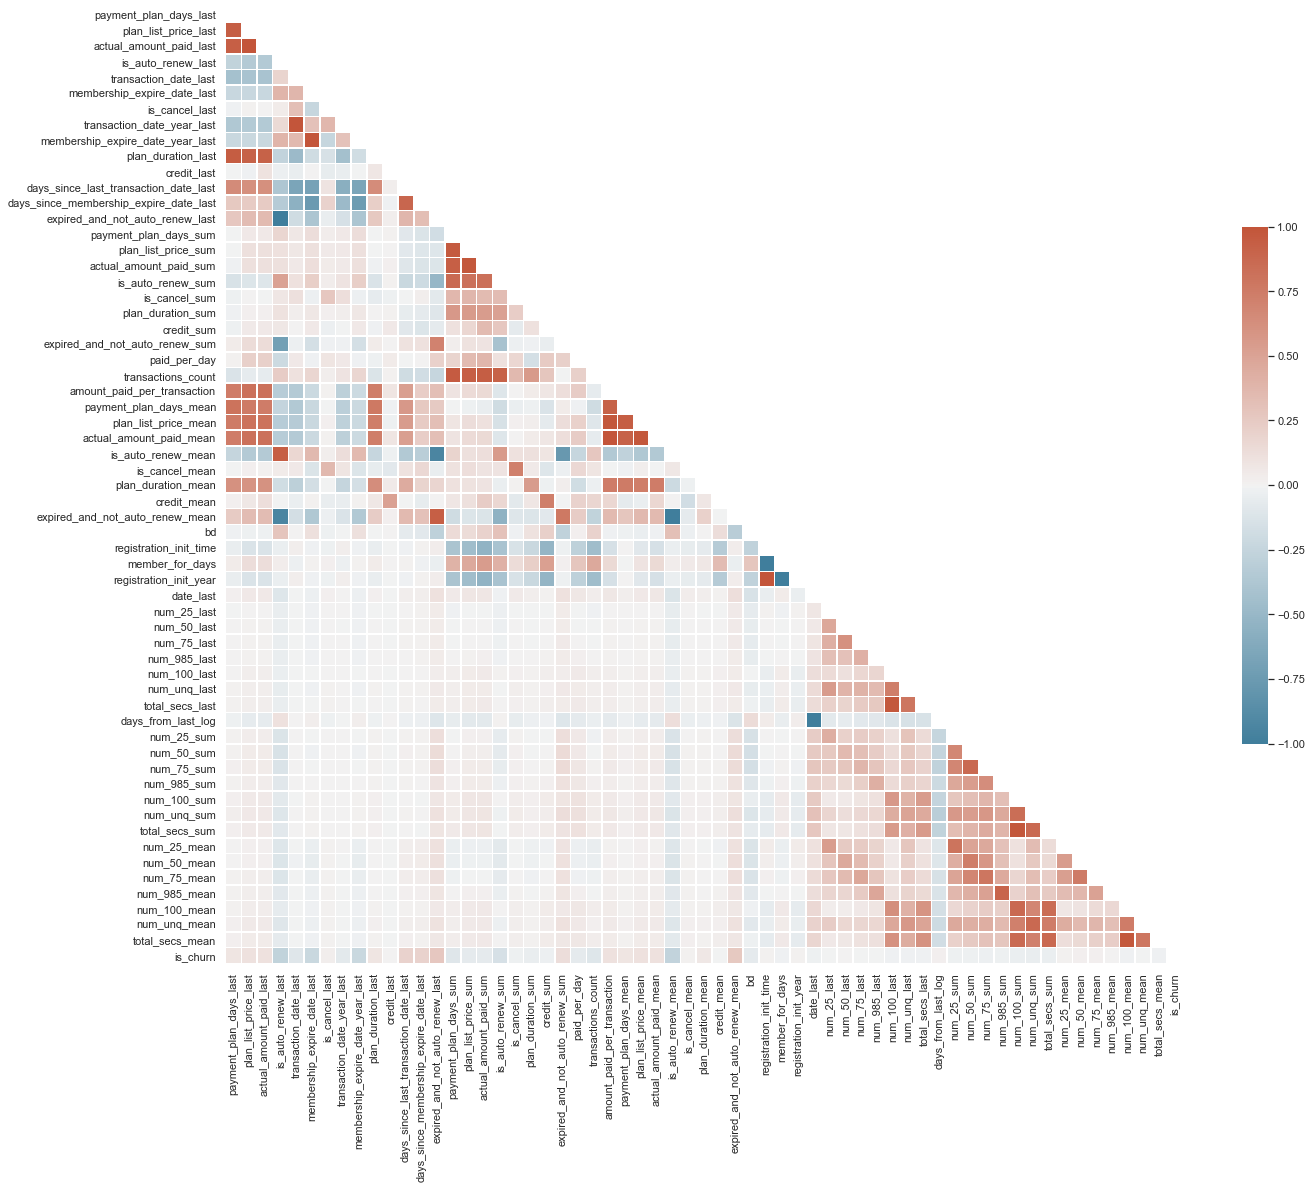

In [21]:
sns.set_style('whitegrid')
corr_matrix = pd.concat([X_train[numerical_columns], y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .4})
plt.tight_layout()

In [22]:
abs(corr_matrix.loc['is_churn',:]).sort_values(ascending=False)[:20]

is_churn                                  1.000000
is_auto_renew_last                        0.273260
expired_and_not_auto_renew_last           0.273260
is_auto_renew_mean                        0.261303
expired_and_not_auto_renew_mean           0.261303
membership_expire_date_last               0.225998
membership_expire_date_year_last          0.223949
days_since_membership_expire_date_last    0.202191
days_since_last_transaction_date_last     0.197695
is_auto_renew_sum                         0.151052
expired_and_not_auto_renew_sum            0.129069
transactions_count                        0.108431
plan_list_price_last                      0.105949
actual_amount_paid_last                   0.105943
plan_list_price_mean                      0.103427
amount_paid_per_transaction               0.101990
actual_amount_paid_mean                   0.101990
transaction_date_last                     0.095096
payment_plan_days_sum                     0.093888
plan_duration_last             

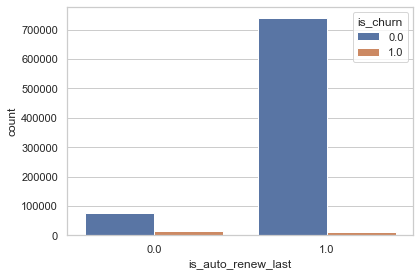

In [23]:
sns.countplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
               x='is_auto_renew_last',
               hue='is_churn')
plt.tight_layout()

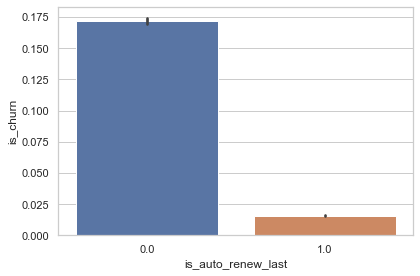

In [24]:
sns.barplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
               x='is_auto_renew_last',
               y='is_churn')
plt.tight_layout()

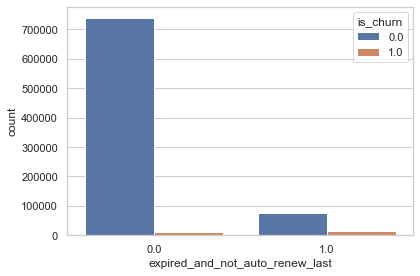

In [25]:
sns.countplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
               x='expired_and_not_auto_renew_last',
               hue='is_churn')
plt.tight_layout()

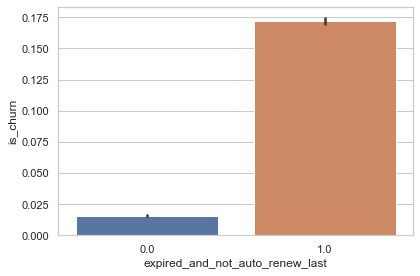

In [26]:
sns.barplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
               x='expired_and_not_auto_renew_last',
               y='is_churn')
plt.tight_layout()

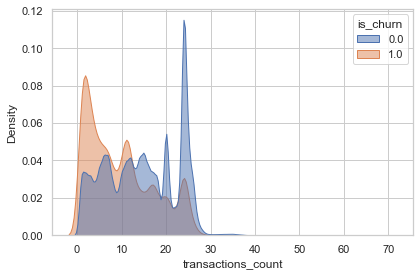

In [27]:
sns.kdeplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
            x='transactions_count',
            hue='is_churn',
            fill=True, 
            common_norm=False,
            alpha=.5)
plt.tight_layout()

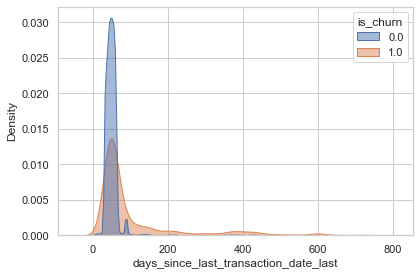

In [28]:
sns.kdeplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
            x='days_since_last_transaction_date_last',
            hue='is_churn',
            fill=True, 
            common_norm=False,
            alpha=.5)
plt.tight_layout()

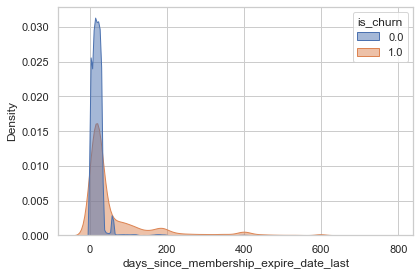

In [29]:
sns.kdeplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
            x='days_since_membership_expire_date_last',
            hue='is_churn',
            fill=True, 
            common_norm=False,
            alpha=.5)
plt.tight_layout()

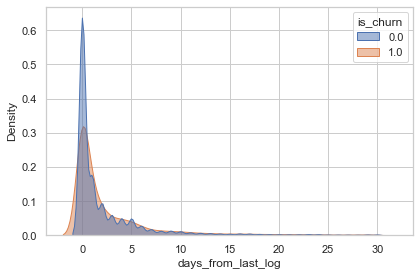

In [30]:
sns.kdeplot(data=pd.concat([X_train[numerical_columns], y_train], axis=1),
            x='days_from_last_log',
            hue='is_churn',
            fill=True, 
            common_norm=False,
            alpha=.5)
plt.tight_layout()

In [31]:
# imputation
from sklearn.impute import SimpleImputer

# Imputation - categorical columns
imputer_most_freq = SimpleImputer(strategy='most_frequent')

X_train_filled = X_train.copy()
X_valid_filled = X_valid.copy()
X_test_filled = X_test.copy()
X_train_filled[categorical_columns] = pd.DataFrame(imputer_most_freq.fit_transform(X_train_filled[categorical_columns]))
X_valid_filled[categorical_columns] = pd.DataFrame(imputer_most_freq.transform(X_valid_filled[categorical_columns]))
X_test_filled[categorical_columns] = pd.DataFrame(imputer_most_freq.transform(X_test_filled[categorical_columns]))

# imputation removed column names, put them back
X_train_filled[categorical_columns].columns = X_train[categorical_columns].columns
X_valid_filled[categorical_columns].columns = X_valid[categorical_columns].columns
X_test_filled[categorical_columns].columns = X_test[categorical_columns].columns

# convert 'object' to category
X_train_filled[categorical_columns] = X_train_filled[categorical_columns].astype('category')
X_valid_filled[categorical_columns] = X_valid_filled[categorical_columns].astype('category')
X_test_filled[categorical_columns] = X_test_filled[categorical_columns].astype('category')

In [32]:
# Imputation - numerical columns
imputer_median = SimpleImputer(strategy='median')

X_train_filled = X_train_filled.copy()
X_valid_filled = X_valid_filled.copy()
X_test_filled = X_test_filled.copy()
X_train_filled[numerical_columns] = pd.DataFrame(imputer_median.fit_transform(X_train_filled[numerical_columns]))
X_valid_filled[numerical_columns] = pd.DataFrame(imputer_median.transform(X_valid_filled[numerical_columns]))
X_test_filled[numerical_columns] = pd.DataFrame(imputer_median.transform(X_test_filled[numerical_columns]))

# imputation removed column names, put them back
X_train_filled[numerical_columns].columns = X_train[numerical_columns].columns
X_valid_filled[numerical_columns].columns = X_valid[numerical_columns].columns
X_test_filled[numerical_columns].columns = X_test[numerical_columns].columns

## CatBoost

In [33]:
from catboost import CatBoostClassifier, Pool

cat_clf = CatBoostClassifier(loss_function='Logloss',
                             cat_features=categorical_columns,
                             verbose=True)
cat_clf.fit(X_train_filled, y_train, early_stopping_rounds=10)

Learning rate set to 0.186265
0:	learn: 0.4227370	total: 1.84s	remaining: 30m 35s
1:	learn: 0.2908211	total: 2.89s	remaining: 24m 2s
2:	learn: 0.2184057	total: 3.87s	remaining: 21m 26s
3:	learn: 0.1829373	total: 4.76s	remaining: 19m 45s
4:	learn: 0.1589221	total: 5.7s	remaining: 18m 54s
5:	learn: 0.1447087	total: 6.64s	remaining: 18m 20s
6:	learn: 0.1369804	total: 7.58s	remaining: 17m 55s
7:	learn: 0.1330284	total: 8.63s	remaining: 17m 49s
8:	learn: 0.1296447	total: 9.5s	remaining: 17m 26s
9:	learn: 0.1271784	total: 10.4s	remaining: 17m 9s
10:	learn: 0.1254992	total: 11.4s	remaining: 17m 7s
11:	learn: 0.1242419	total: 12.4s	remaining: 16m 59s
12:	learn: 0.1229962	total: 13.4s	remaining: 16m 55s
13:	learn: 0.1220908	total: 14.3s	remaining: 16m 46s
14:	learn: 0.1217741	total: 15.2s	remaining: 16m 39s
15:	learn: 0.1213697	total: 16.1s	remaining: 16m 31s
16:	learn: 0.1211607	total: 17s	remaining: 16m 25s
17:	learn: 0.1209323	total: 17.9s	remaining: 16m 19s
18:	learn: 0.1207139	total: 18.9s

153:	learn: 0.1134616	total: 2m 26s	remaining: 13m 25s
154:	learn: 0.1134333	total: 2m 27s	remaining: 13m 24s
155:	learn: 0.1134099	total: 2m 28s	remaining: 13m 22s
156:	learn: 0.1134001	total: 2m 29s	remaining: 13m 21s
157:	learn: 0.1133857	total: 2m 30s	remaining: 13m 20s
158:	learn: 0.1133603	total: 2m 31s	remaining: 13m 19s
159:	learn: 0.1133410	total: 2m 32s	remaining: 13m 18s
160:	learn: 0.1133391	total: 2m 32s	remaining: 13m 17s
161:	learn: 0.1133298	total: 2m 33s	remaining: 13m 16s
162:	learn: 0.1133157	total: 2m 34s	remaining: 13m 14s
163:	learn: 0.1133145	total: 2m 35s	remaining: 13m 13s
164:	learn: 0.1132995	total: 2m 36s	remaining: 13m 12s
165:	learn: 0.1132798	total: 2m 37s	remaining: 13m 11s
166:	learn: 0.1132661	total: 2m 38s	remaining: 13m 10s
167:	learn: 0.1132461	total: 2m 39s	remaining: 13m 9s
168:	learn: 0.1132291	total: 2m 40s	remaining: 13m 7s
169:	learn: 0.1132245	total: 2m 40s	remaining: 13m 6s
170:	learn: 0.1132004	total: 2m 41s	remaining: 13m 5s
171:	learn: 0.

304:	learn: 0.1113378	total: 4m 49s	remaining: 10m 58s
305:	learn: 0.1113296	total: 4m 49s	remaining: 10m 57s
306:	learn: 0.1113142	total: 4m 50s	remaining: 10m 56s
307:	learn: 0.1113014	total: 4m 51s	remaining: 10m 55s
308:	learn: 0.1112871	total: 4m 52s	remaining: 10m 54s
309:	learn: 0.1112745	total: 4m 53s	remaining: 10m 53s
310:	learn: 0.1112554	total: 4m 54s	remaining: 10m 52s
311:	learn: 0.1112497	total: 4m 55s	remaining: 10m 52s
312:	learn: 0.1112369	total: 4m 56s	remaining: 10m 51s
313:	learn: 0.1112265	total: 4m 57s	remaining: 10m 50s
314:	learn: 0.1112070	total: 4m 58s	remaining: 10m 49s
315:	learn: 0.1112028	total: 4m 59s	remaining: 10m 48s
316:	learn: 0.1111902	total: 5m	remaining: 10m 47s
317:	learn: 0.1111787	total: 5m 1s	remaining: 10m 46s
318:	learn: 0.1111561	total: 5m 2s	remaining: 10m 45s
319:	learn: 0.1111379	total: 5m 3s	remaining: 10m 44s
320:	learn: 0.1111254	total: 5m 4s	remaining: 10m 44s
321:	learn: 0.1111199	total: 5m 5s	remaining: 10m 43s
322:	learn: 0.11110

456:	learn: 0.1095637	total: 7m 13s	remaining: 8m 35s
457:	learn: 0.1095565	total: 7m 14s	remaining: 8m 34s
458:	learn: 0.1095479	total: 7m 15s	remaining: 8m 33s
459:	learn: 0.1095436	total: 7m 16s	remaining: 8m 32s
460:	learn: 0.1095306	total: 7m 17s	remaining: 8m 31s
461:	learn: 0.1095249	total: 7m 18s	remaining: 8m 30s
462:	learn: 0.1095149	total: 7m 19s	remaining: 8m 29s
463:	learn: 0.1095039	total: 7m 20s	remaining: 8m 28s
464:	learn: 0.1095016	total: 7m 21s	remaining: 8m 27s
465:	learn: 0.1094817	total: 7m 22s	remaining: 8m 26s
466:	learn: 0.1094668	total: 7m 23s	remaining: 8m 25s
467:	learn: 0.1094621	total: 7m 24s	remaining: 8m 25s
468:	learn: 0.1094482	total: 7m 25s	remaining: 8m 24s
469:	learn: 0.1094399	total: 7m 26s	remaining: 8m 23s
470:	learn: 0.1094296	total: 7m 27s	remaining: 8m 22s
471:	learn: 0.1094165	total: 7m 28s	remaining: 8m 21s
472:	learn: 0.1094023	total: 7m 29s	remaining: 8m 20s
473:	learn: 0.1093867	total: 7m 30s	remaining: 8m 19s
474:	learn: 0.1093768	total:

609:	learn: 0.1079410	total: 9m 39s	remaining: 6m 10s
610:	learn: 0.1079306	total: 9m 40s	remaining: 6m 9s
611:	learn: 0.1079255	total: 9m 41s	remaining: 6m 8s
612:	learn: 0.1079030	total: 9m 42s	remaining: 6m 7s
613:	learn: 0.1078726	total: 9m 43s	remaining: 6m 7s
614:	learn: 0.1078637	total: 9m 44s	remaining: 6m 6s
615:	learn: 0.1078618	total: 9m 45s	remaining: 6m 5s
616:	learn: 0.1078514	total: 9m 46s	remaining: 6m 4s
617:	learn: 0.1078405	total: 9m 47s	remaining: 6m 3s
618:	learn: 0.1078350	total: 9m 48s	remaining: 6m 2s
619:	learn: 0.1078327	total: 9m 49s	remaining: 6m 1s
620:	learn: 0.1078016	total: 9m 50s	remaining: 6m
621:	learn: 0.1077890	total: 9m 51s	remaining: 5m 59s
622:	learn: 0.1077781	total: 9m 52s	remaining: 5m 58s
623:	learn: 0.1077667	total: 9m 53s	remaining: 5m 57s
624:	learn: 0.1077565	total: 9m 54s	remaining: 5m 56s
625:	learn: 0.1077422	total: 9m 55s	remaining: 5m 55s
626:	learn: 0.1077286	total: 9m 56s	remaining: 5m 55s
627:	learn: 0.1077263	total: 9m 57s	remain

760:	learn: 0.1064230	total: 12m 6s	remaining: 3m 48s
761:	learn: 0.1064174	total: 12m 7s	remaining: 3m 47s
762:	learn: 0.1064155	total: 12m 8s	remaining: 3m 46s
763:	learn: 0.1064000	total: 12m 9s	remaining: 3m 45s
764:	learn: 0.1063844	total: 12m 10s	remaining: 3m 44s
765:	learn: 0.1063759	total: 12m 11s	remaining: 3m 43s
766:	learn: 0.1063629	total: 12m 12s	remaining: 3m 42s
767:	learn: 0.1063518	total: 12m 13s	remaining: 3m 41s
768:	learn: 0.1063481	total: 12m 14s	remaining: 3m 40s
769:	learn: 0.1063316	total: 12m 15s	remaining: 3m 39s
770:	learn: 0.1063200	total: 12m 16s	remaining: 3m 38s
771:	learn: 0.1063073	total: 12m 17s	remaining: 3m 37s
772:	learn: 0.1063044	total: 12m 17s	remaining: 3m 36s
773:	learn: 0.1062968	total: 12m 18s	remaining: 3m 35s
774:	learn: 0.1062872	total: 12m 19s	remaining: 3m 34s
775:	learn: 0.1062741	total: 12m 20s	remaining: 3m 33s
776:	learn: 0.1062658	total: 12m 21s	remaining: 3m 32s
777:	learn: 0.1062587	total: 12m 22s	remaining: 3m 31s
778:	learn: 0.

911:	learn: 0.1050274	total: 14m 27s	remaining: 1m 23s
912:	learn: 0.1050143	total: 14m 28s	remaining: 1m 22s
913:	learn: 0.1050012	total: 14m 29s	remaining: 1m 21s
914:	learn: 0.1049886	total: 14m 30s	remaining: 1m 20s
915:	learn: 0.1049871	total: 14m 31s	remaining: 1m 19s
916:	learn: 0.1049801	total: 14m 32s	remaining: 1m 18s
917:	learn: 0.1049716	total: 14m 33s	remaining: 1m 18s
918:	learn: 0.1049658	total: 14m 34s	remaining: 1m 17s
919:	learn: 0.1049533	total: 14m 35s	remaining: 1m 16s
920:	learn: 0.1049401	total: 14m 36s	remaining: 1m 15s
921:	learn: 0.1049261	total: 14m 37s	remaining: 1m 14s
922:	learn: 0.1049112	total: 14m 38s	remaining: 1m 13s
923:	learn: 0.1049021	total: 14m 39s	remaining: 1m 12s
924:	learn: 0.1048845	total: 14m 40s	remaining: 1m 11s
925:	learn: 0.1048782	total: 14m 41s	remaining: 1m 10s
926:	learn: 0.1048679	total: 14m 41s	remaining: 1m 9s
927:	learn: 0.1048556	total: 14m 42s	remaining: 1m 8s
928:	learn: 0.1048484	total: 14m 43s	remaining: 1m 7s
929:	learn: 0

In [34]:
y_pred_cat = cat_clf.predict(X_valid_filled)
y_pred_proba_cat = cat_clf.predict_proba(X_valid_filled)
y_pred_train_cat = cat_clf.predict(X_train_filled)
y_pred_proba_train_cat = cat_clf.predict_proba(X_train_filled)
print('CatBoost Classifier log-loss train set: ' + str(log_loss(y_train, y_pred_proba_train_cat[:,1])))
print('CatBoost Classifier log-loss validation set: ' + str(log_loss(y_valid, y_pred_proba_cat[:,1])))

CatBoost Classifier log-loss train set: 0.10473863318348145
CatBoost Classifier log-loss validation set: 0.13801159922192027


### One Hot Encoding

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe_enc = OneHotEncoder(drop='first')
ohe_enc.fit(X_train_filled[categorical_columns])
feature_names = ohe_enc.get_feature_names(categorical_columns)
X_train_filled_ohe = ohe_enc.transform(X_train_filled[categorical_columns])
X_train_filled_ohe = pd.DataFrame(X_train_filled_ohe.todense())
X_train_filled_ohe.columns = feature_names
X_train_filled_ohe.head()

,payment_method_id_last_payment_method_id_33,payment_method_id_last_payment_method_id_34,payment_method_id_last_payment_method_id_36,payment_method_id_last_payment_method_id_37,payment_method_id_last_payment_method_id_38,payment_method_id_last_payment_method_id_40,payment_method_id_last_payment_method_id_41,payment_method_id_last_payment_method_id_other,transaction_date_day_last_Mon,transaction_date_day_last_Sat,transaction_date_day_last_Sun,transaction_date_day_last_Thu,transaction_date_day_last_Tue,transaction_date_day_last_Wed,membership_expire_date_day_last_Mon,membership_expire_date_day_last_Sat,membership_expire_date_day_last_Sun,membership_expire_date_day_last_Thu,membership_expire_date_day_last_Tue,membership_expire_date_day_last_Wed,transaction_date_month_last_Aug,transaction_date_month_last_Dec,transaction_date_month_last_Feb,transaction_date_month_last_Jan,transaction_date_month_last_Jul,transaction_date_month_last_Jun,transaction_date_month_last_Mar,transaction_date_month_last_May,transaction_date_month_last_Nov,transaction_date_month_last_Oct,transaction_date_month_last_Sep,membership_expire_date_month_last_Aug,membership_expire_date_month_last_Dec,membership_expire_date_month_last_Feb,membership_expire_date_month_last_Jan,membership_expire_date_month_last_Jul,membership_expire_date_month_last_Jun,membership_expire_date_month_last_Mar,membership_expire_date_month_last_May,membership_expire_date_month_last_Nov,membership_expire_date_month_last_Oct,membership_expire_date_month_last_Sep,transaction_credit_last_debit,transaction_credit_last_even,overall_credit_debit,overall_credit_even,city_city_13,city_city_4,city_city_5,city_city_other,gender_male,gender_missing,registered_via_registered_via_3,registered_via_registered_via_4,registered_via_registered_via_7,registered_via_registered_via_9,registration_init_day_Mon,registration_init_day_Sat,registration_init_day_Sun,registration_init_day_Thu,registration_init_day_Tue,registration_init_day_Wed,registration_init_month_Aug,registration_init_month_Dec,registration_init_month_Feb,registration_init_month_Jan,registration_init_month_Jul,registration_init_month_Jun,registration_init_month_Mar,registration_init_month_May,registration_init_month_Nov,registration_init_month_Oct,registration_init_month_Sep
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
X_valid_filled_ohe = ohe_enc.transform(X_valid_filled[categorical_columns])
X_valid_filled_ohe = pd.DataFrame(X_valid_filled_ohe.todense())
X_valid_filled_ohe.columns = feature_names
X_valid_filled_ohe.head()

,payment_method_id_last_payment_method_id_33,payment_method_id_last_payment_method_id_34,payment_method_id_last_payment_method_id_36,payment_method_id_last_payment_method_id_37,payment_method_id_last_payment_method_id_38,payment_method_id_last_payment_method_id_40,payment_method_id_last_payment_method_id_41,payment_method_id_last_payment_method_id_other,transaction_date_day_last_Mon,transaction_date_day_last_Sat,transaction_date_day_last_Sun,transaction_date_day_last_Thu,transaction_date_day_last_Tue,transaction_date_day_last_Wed,membership_expire_date_day_last_Mon,membership_expire_date_day_last_Sat,membership_expire_date_day_last_Sun,membership_expire_date_day_last_Thu,membership_expire_date_day_last_Tue,membership_expire_date_day_last_Wed,transaction_date_month_last_Aug,transaction_date_month_last_Dec,transaction_date_month_last_Feb,transaction_date_month_last_Jan,transaction_date_month_last_Jul,transaction_date_month_last_Jun,transaction_date_month_last_Mar,transaction_date_month_last_May,transaction_date_month_last_Nov,transaction_date_month_last_Oct,transaction_date_month_last_Sep,membership_expire_date_month_last_Aug,membership_expire_date_month_last_Dec,membership_expire_date_month_last_Feb,membership_expire_date_month_last_Jan,membership_expire_date_month_last_Jul,membership_expire_date_month_last_Jun,membership_expire_date_month_last_Mar,membership_expire_date_month_last_May,membership_expire_date_month_last_Nov,membership_expire_date_month_last_Oct,membership_expire_date_month_last_Sep,transaction_credit_last_debit,transaction_credit_last_even,overall_credit_debit,overall_credit_even,city_city_13,city_city_4,city_city_5,city_city_other,gender_male,gender_missing,registered_via_registered_via_3,registered_via_registered_via_4,registered_via_registered_via_7,registered_via_registered_via_9,registration_init_day_Mon,registration_init_day_Sat,registration_init_day_Sun,registration_init_day_Thu,registration_init_day_Tue,registration_init_day_Wed,registration_init_month_Aug,registration_init_month_Dec,registration_init_month_Feb,registration_init_month_Jan,registration_init_month_Jul,registration_init_month_Jun,registration_init_month_Mar,registration_init_month_May,registration_init_month_Nov,registration_init_month_Oct,registration_init_month_Sep
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
X_test_filled_ohe = ohe_enc.transform(X_test_filled[categorical_columns])
X_test_filled_ohe = pd.DataFrame(X_test_filled_ohe.todense())
X_test_filled_ohe.columns = feature_names
X_test_filled_ohe.head()

,payment_method_id_last_payment_method_id_33,payment_method_id_last_payment_method_id_34,payment_method_id_last_payment_method_id_36,payment_method_id_last_payment_method_id_37,payment_method_id_last_payment_method_id_38,payment_method_id_last_payment_method_id_40,payment_method_id_last_payment_method_id_41,payment_method_id_last_payment_method_id_other,transaction_date_day_last_Mon,transaction_date_day_last_Sat,transaction_date_day_last_Sun,transaction_date_day_last_Thu,transaction_date_day_last_Tue,transaction_date_day_last_Wed,membership_expire_date_day_last_Mon,membership_expire_date_day_last_Sat,membership_expire_date_day_last_Sun,membership_expire_date_day_last_Thu,membership_expire_date_day_last_Tue,membership_expire_date_day_last_Wed,transaction_date_month_last_Aug,transaction_date_month_last_Dec,transaction_date_month_last_Feb,transaction_date_month_last_Jan,transaction_date_month_last_Jul,transaction_date_month_last_Jun,transaction_date_month_last_Mar,transaction_date_month_last_May,transaction_date_month_last_Nov,transaction_date_month_last_Oct,transaction_date_month_last_Sep,membership_expire_date_month_last_Aug,membership_expire_date_month_last_Dec,membership_expire_date_month_last_Feb,membership_expire_date_month_last_Jan,membership_expire_date_month_last_Jul,membership_expire_date_month_last_Jun,membership_expire_date_month_last_Mar,membership_expire_date_month_last_May,membership_expire_date_month_last_Nov,membership_expire_date_month_last_Oct,membership_expire_date_month_last_Sep,transaction_credit_last_debit,transaction_credit_last_even,overall_credit_debit,overall_credit_even,city_city_13,city_city_4,city_city_5,city_city_other,gender_male,gender_missing,registered_via_registered_via_3,registered_via_registered_via_4,registered_via_registered_via_7,registered_via_registered_via_9,registration_init_day_Mon,registration_init_day_Sat,registration_init_day_Sun,registration_init_day_Thu,registration_init_day_Tue,registration_init_day_Wed,registration_init_month_Aug,registration_init_month_Dec,registration_init_month_Feb,registration_init_month_Jan,registration_init_month_Jul,registration_init_month_Jun,registration_init_month_Mar,registration_init_month_May,registration_init_month_Nov,registration_init_month_Oct,registration_init_month_Sep
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train_filled.drop(categorical_columns, axis=1, inplace=True)
X_valid_filled.drop(categorical_columns, axis=1, inplace=True)
X_test_filled.drop(categorical_columns, axis=1, inplace=True)
X_train_filled = pd.concat([X_train_filled, X_train_filled_ohe], axis=1)
X_valid_filled = pd.concat([X_valid_filled, X_valid_filled_ohe], axis=1)
X_test_filled = pd.concat([X_test_filled, X_test_filled_ohe], axis=1)

In [39]:
X_train_filled.shape, y_train.shape, X_valid_filled.shape, y_valid.shape, X_test_filled.shape

((879537, 133), (879537,), (886500, 133), (886500,), (907471, 133))

In [40]:
X_train_filled.isnull().sum().sum(), \
X_valid_filled.isnull().sum().sum(), \
X_test_filled.isnull().sum().sum()

(0, 0, 0)

In [41]:
X_train_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879537 entries, 0 to 879536
Columns: 133 entries, payment_plan_days_last to registration_init_month_Sep
dtypes: float64(133)
memory usage: 939.2 MB


In [42]:
a = (len(y_train)- y_train.sum())/y_train.sum()
a, np.sqrt(a)

(24.287858313446996, 4.928271331151218)

## CatBoost with OHE

In [43]:
cat_clf = CatBoostClassifier(loss_function='Logloss',
                             verbose=True)
cat_clf.fit(X_train_filled, y_train, early_stopping_rounds=10)

Learning rate set to 0.186265
0:	learn: 0.4242998	total: 162ms	remaining: 2m 41s
1:	learn: 0.2952091	total: 310ms	remaining: 2m 34s
2:	learn: 0.2194941	total: 500ms	remaining: 2m 46s
3:	learn: 0.1845989	total: 654ms	remaining: 2m 42s
4:	learn: 0.1600352	total: 820ms	remaining: 2m 43s
5:	learn: 0.1450921	total: 1.01s	remaining: 2m 46s
6:	learn: 0.1388628	total: 1.17s	remaining: 2m 45s
7:	learn: 0.1329174	total: 1.34s	remaining: 2m 45s
8:	learn: 0.1296483	total: 1.49s	remaining: 2m 44s
9:	learn: 0.1272887	total: 1.68s	remaining: 2m 46s
10:	learn: 0.1256568	total: 1.85s	remaining: 2m 46s
11:	learn: 0.1244777	total: 2.04s	remaining: 2m 47s
12:	learn: 0.1233036	total: 2.21s	remaining: 2m 47s
13:	learn: 0.1226870	total: 2.38s	remaining: 2m 47s
14:	learn: 0.1222440	total: 2.55s	remaining: 2m 47s
15:	learn: 0.1219791	total: 2.73s	remaining: 2m 47s
16:	learn: 0.1215190	total: 2.91s	remaining: 2m 48s
17:	learn: 0.1210434	total: 3.13s	remaining: 2m 50s
18:	learn: 0.1209133	total: 3.31s	remaining:

157:	learn: 0.1134525	total: 26.9s	remaining: 2m 23s
158:	learn: 0.1134405	total: 27s	remaining: 2m 23s
159:	learn: 0.1134070	total: 27.2s	remaining: 2m 22s
160:	learn: 0.1133929	total: 27.4s	remaining: 2m 22s
161:	learn: 0.1133825	total: 27.6s	remaining: 2m 22s
162:	learn: 0.1133681	total: 27.8s	remaining: 2m 22s
163:	learn: 0.1133600	total: 28s	remaining: 2m 22s
164:	learn: 0.1133438	total: 28.1s	remaining: 2m 22s
165:	learn: 0.1133339	total: 28.3s	remaining: 2m 22s
166:	learn: 0.1133168	total: 28.5s	remaining: 2m 22s
167:	learn: 0.1132961	total: 28.6s	remaining: 2m 21s
168:	learn: 0.1132706	total: 28.8s	remaining: 2m 21s
169:	learn: 0.1132565	total: 29s	remaining: 2m 21s
170:	learn: 0.1132465	total: 29.2s	remaining: 2m 21s
171:	learn: 0.1132305	total: 29.3s	remaining: 2m 21s
172:	learn: 0.1132169	total: 29.5s	remaining: 2m 21s
173:	learn: 0.1131984	total: 29.7s	remaining: 2m 21s
174:	learn: 0.1131787	total: 29.9s	remaining: 2m 20s
175:	learn: 0.1131400	total: 30.1s	remaining: 2m 20s

314:	learn: 0.1111013	total: 54.5s	remaining: 1m 58s
315:	learn: 0.1110872	total: 54.7s	remaining: 1m 58s
316:	learn: 0.1110723	total: 54.9s	remaining: 1m 58s
317:	learn: 0.1110574	total: 55.1s	remaining: 1m 58s
318:	learn: 0.1110447	total: 55.3s	remaining: 1m 58s
319:	learn: 0.1110238	total: 55.5s	remaining: 1m 57s
320:	learn: 0.1110122	total: 55.7s	remaining: 1m 57s
321:	learn: 0.1109986	total: 55.9s	remaining: 1m 57s
322:	learn: 0.1109899	total: 56.1s	remaining: 1m 57s
323:	learn: 0.1109810	total: 56.2s	remaining: 1m 57s
324:	learn: 0.1109669	total: 56.4s	remaining: 1m 57s
325:	learn: 0.1109581	total: 56.6s	remaining: 1m 56s
326:	learn: 0.1109503	total: 56.8s	remaining: 1m 56s
327:	learn: 0.1109396	total: 57s	remaining: 1m 56s
328:	learn: 0.1109243	total: 57.2s	remaining: 1m 56s
329:	learn: 0.1109181	total: 57.3s	remaining: 1m 56s
330:	learn: 0.1109066	total: 57.5s	remaining: 1m 56s
331:	learn: 0.1108912	total: 57.7s	remaining: 1m 56s
332:	learn: 0.1108654	total: 57.9s	remaining: 1m

468:	learn: 0.1092511	total: 1m 22s	remaining: 1m 33s
469:	learn: 0.1092354	total: 1m 22s	remaining: 1m 32s
470:	learn: 0.1092262	total: 1m 22s	remaining: 1m 32s
471:	learn: 0.1092142	total: 1m 22s	remaining: 1m 32s
472:	learn: 0.1092049	total: 1m 22s	remaining: 1m 32s
473:	learn: 0.1091939	total: 1m 23s	remaining: 1m 32s
474:	learn: 0.1091873	total: 1m 23s	remaining: 1m 32s
475:	learn: 0.1091801	total: 1m 23s	remaining: 1m 31s
476:	learn: 0.1091658	total: 1m 23s	remaining: 1m 31s
477:	learn: 0.1091423	total: 1m 23s	remaining: 1m 31s
478:	learn: 0.1091270	total: 1m 23s	remaining: 1m 31s
479:	learn: 0.1091139	total: 1m 24s	remaining: 1m 31s
480:	learn: 0.1091041	total: 1m 24s	remaining: 1m 30s
481:	learn: 0.1090956	total: 1m 24s	remaining: 1m 30s
482:	learn: 0.1090904	total: 1m 24s	remaining: 1m 30s
483:	learn: 0.1090808	total: 1m 24s	remaining: 1m 30s
484:	learn: 0.1090686	total: 1m 24s	remaining: 1m 30s
485:	learn: 0.1090586	total: 1m 25s	remaining: 1m 29s
486:	learn: 0.1090503	total:

621:	learn: 0.1076341	total: 1m 46s	remaining: 1m 4s
622:	learn: 0.1076202	total: 1m 47s	remaining: 1m 4s
623:	learn: 0.1076090	total: 1m 47s	remaining: 1m 4s
624:	learn: 0.1075989	total: 1m 47s	remaining: 1m 4s
625:	learn: 0.1075881	total: 1m 47s	remaining: 1m 4s
626:	learn: 0.1075796	total: 1m 47s	remaining: 1m 4s
627:	learn: 0.1075711	total: 1m 47s	remaining: 1m 3s
628:	learn: 0.1075576	total: 1m 48s	remaining: 1m 3s
629:	learn: 0.1075457	total: 1m 48s	remaining: 1m 3s
630:	learn: 0.1075360	total: 1m 48s	remaining: 1m 3s
631:	learn: 0.1075283	total: 1m 48s	remaining: 1m 3s
632:	learn: 0.1075186	total: 1m 48s	remaining: 1m 3s
633:	learn: 0.1075093	total: 1m 48s	remaining: 1m 2s
634:	learn: 0.1075003	total: 1m 49s	remaining: 1m 2s
635:	learn: 0.1074912	total: 1m 49s	remaining: 1m 2s
636:	learn: 0.1074818	total: 1m 49s	remaining: 1m 2s
637:	learn: 0.1074756	total: 1m 49s	remaining: 1m 2s
638:	learn: 0.1074631	total: 1m 49s	remaining: 1m 2s
639:	learn: 0.1074530	total: 1m 49s	remaining:

779:	learn: 0.1061242	total: 2m 11s	remaining: 37.2s
780:	learn: 0.1061162	total: 2m 12s	remaining: 37s
781:	learn: 0.1061058	total: 2m 12s	remaining: 36.8s
782:	learn: 0.1060990	total: 2m 12s	remaining: 36.7s
783:	learn: 0.1060934	total: 2m 12s	remaining: 36.5s
784:	learn: 0.1060815	total: 2m 12s	remaining: 36.3s
785:	learn: 0.1060707	total: 2m 12s	remaining: 36.2s
786:	learn: 0.1060566	total: 2m 12s	remaining: 36s
787:	learn: 0.1060489	total: 2m 13s	remaining: 35.8s
788:	learn: 0.1060464	total: 2m 13s	remaining: 35.6s
789:	learn: 0.1060308	total: 2m 13s	remaining: 35.5s
790:	learn: 0.1060130	total: 2m 13s	remaining: 35.3s
791:	learn: 0.1060041	total: 2m 13s	remaining: 35.1s
792:	learn: 0.1059984	total: 2m 13s	remaining: 35s
793:	learn: 0.1059881	total: 2m 14s	remaining: 34.8s
794:	learn: 0.1059823	total: 2m 14s	remaining: 34.6s
795:	learn: 0.1059721	total: 2m 14s	remaining: 34.5s
796:	learn: 0.1059615	total: 2m 14s	remaining: 34.3s
797:	learn: 0.1059561	total: 2m 14s	remaining: 34.1s

935:	learn: 0.1047052	total: 2m 35s	remaining: 10.6s
936:	learn: 0.1046996	total: 2m 35s	remaining: 10.5s
937:	learn: 0.1046936	total: 2m 35s	remaining: 10.3s
938:	learn: 0.1046817	total: 2m 36s	remaining: 10.1s
939:	learn: 0.1046732	total: 2m 36s	remaining: 9.97s
940:	learn: 0.1046642	total: 2m 36s	remaining: 9.81s
941:	learn: 0.1046550	total: 2m 36s	remaining: 9.64s
942:	learn: 0.1046483	total: 2m 36s	remaining: 9.47s
943:	learn: 0.1046371	total: 2m 36s	remaining: 9.31s
944:	learn: 0.1046278	total: 2m 37s	remaining: 9.14s
945:	learn: 0.1046183	total: 2m 37s	remaining: 8.97s
946:	learn: 0.1046144	total: 2m 37s	remaining: 8.81s
947:	learn: 0.1046072	total: 2m 37s	remaining: 8.64s
948:	learn: 0.1045981	total: 2m 37s	remaining: 8.47s
949:	learn: 0.1045926	total: 2m 37s	remaining: 8.31s
950:	learn: 0.1045807	total: 2m 37s	remaining: 8.14s
951:	learn: 0.1045767	total: 2m 38s	remaining: 7.97s
952:	learn: 0.1045703	total: 2m 38s	remaining: 7.81s
953:	learn: 0.1045634	total: 2m 38s	remaining:

In [44]:
y_pred_cat = cat_clf.predict(X_valid_filled)
y_pred_proba_cat = cat_clf.predict_proba(X_valid_filled)
y_pred_train_cat = cat_clf.predict(X_train_filled)
y_pred_proba_train_cat = cat_clf.predict_proba(X_train_filled)
print('CatBoost Classifier log-loss train set: ' + str(log_loss(y_train, y_pred_proba_train_cat[:,1])))
print('CatBoost Classifier log-loss validation set: ' + str(log_loss(y_valid, y_pred_proba_cat[:,1])))

CatBoost Classifier log-loss train set: 0.10418481980964092
CatBoost Classifier log-loss validation set: 0.14021569255737085


## XGB with OHE

In [45]:
xgbc = XGBClassifier(objective='binary:logistic', 
                     eval_metric='logloss',
                     tree_method='hist')
gbm = xgbc.fit(X_train_filled, y_train)
y_pred_xgb = gbm.predict(X_valid_filled)
y_pred_proba_xgb = gbm.predict_proba(X_valid_filled)
y_pred_train_xgb = gbm.predict(X_train_filled)
y_pred_proba_train_xgb = gbm.predict_proba(X_train_filled)

In [46]:
xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='hist',
              validate_parameters=1, verbosity=None)

In [47]:
print('XGBoost Classifier log-loss train set: ' + str(log_loss(y_train, y_pred_proba_train_xgb[:,1])))
print('XGBoost Classifier log-loss valid set: ' + str(log_loss(y_valid, y_pred_proba_xgb[:,1])))

XGBoost Classifier log-loss train set: 0.10516000133779635
XGBoost Classifier log-loss valid set: 0.14008212937842457


### Hyperparameters tuning

Given that we already have a validation set, we will not use k-fold cross validation. Instead, we'll train on X_train and validate on X_valid for a series of hyperparameters. 
Since the parameters space can be quite large, a randomized search is preferable. To accomplish this with sklearn RandomizedSearchCV, and perform validation on a pre-defined validation set, we will set the RandomizedSearchCV cv parameter to PredefinedSplit: see documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

In [48]:
# Generate list of indices for train and validation set:
#   -1 for samples to be included in the train set
#    0 for samples to be included in the validation set
my_test_fold = []

for i in range(len(X_train_filled)):
    my_test_fold.append(-1)

for i in range(len(X_valid_filled)):
    my_test_fold.append(0) 
    

# Concatenate the train and validation sets to provide input to RandomizedSearchCV
X = pd.concat([X_train_filled, X_valid_filled], ignore_index=True)
y = pd.concat([y_train, y_valid], ignore_index=True)

In [49]:
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit

clf = XGBClassifier(objective='binary:logistic',
                    eval_metric='logloss',
                    tree_method='hist')

# Run once with same parameters as the previously trained xgb to validate 
# PredefinedSplit is getting the right training and validation indexes
parameters = {'scale_pos_weight':[1]}
random_search = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=parameters,
                                   cv=PredefinedSplit(test_fold=my_test_fold),
                                   n_iter=1,
                                   verbose=3,
                                   refit=False, # to avoid refit on train + valid together
                                   scoring='neg_log_loss',
                                   return_train_score=True,
                                   random_state=42)
random_search.fit(X, y)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END scale_pos_weight=1;, score=(train=-0.105, test=-0.140) total time=  17.9s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_chi...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
         

It looks like PredefinedSplit is correctly implemented, we can proceed to hyperparameter tuning.

In [50]:
parameters = {'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'gamma' : [0, 2, 5, 10, 20, 50, 100],
              'max_depth': range(1, 15, 1),
              'subsample': [0.7, 0.8, 0.9, 1],
              'min_child_weight': [0.5, 1, 3, 5, 10],
              'n_estimators': [50, 75, 100, 200, 300, 500],
              'scale_pos_weight':[1, 2, 5, 10, 25, 100]
             }

random_search = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=parameters,
                                   cv=PredefinedSplit(test_fold=my_test_fold),
                                   n_iter=60,
                                   verbose=3,
                                   refit=False, # to avoid refit on train + valid together
                                   scoring='neg_log_loss',
                                   return_train_score=True,
                                   random_state=42)
random_search.fit(X, y)

Fitting 1 folds for each of 60 candidates, totalling 60 fits
[CV 1/1] END gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=500, scale_pos_weight=10, subsample=0.9;, score=(train=-0.251, test=-0.296) total time= 1.0min
[CV 1/1] END gamma=5, learning_rate=0.2, max_depth=8, min_child_weight=10, n_estimators=500, scale_pos_weight=5, subsample=1;, score=(train=-0.096, test=-0.159) total time= 1.3min
[CV 1/1] END gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=75, scale_pos_weight=2, subsample=0.7;, score=(train=-0.132, test=-0.150) total time=  13.7s
[CV 1/1] END gamma=100, learning_rate=0.05, max_depth=5, min_child_weight=0.5, n_estimators=200, scale_pos_weight=2, subsample=0.9;, score=(train=-0.125, test=-0.147) total time=  32.7s
[CV 1/1] END gamma=20, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=500, scale_pos_weight=1, subsample=0.9;, score=(train=-0.112, test=-0.137) total time= 1.4min
[CV 1/1] END gamma=2, lear

[CV 1/1] END gamma=2, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=75, scale_pos_weight=25, subsample=1;, score=(train=-0.366, test=-0.378) total time=  23.4s
[CV 1/1] END gamma=50, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=100, scale_pos_weight=100, subsample=0.9;, score=(train=-0.665, test=-0.610) total time=  27.7s
[CV 1/1] END gamma=50, learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=1;, score=(train=-0.116, test=-0.140) total time=  22.8s
[CV 1/1] END gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=10, n_estimators=50, scale_pos_weight=10, subsample=1;, score=(train=-0.254, test=-0.284) total time=   9.2s
[CV 1/1] END gamma=100, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.7;, score=(train=-0.117, test=-0.141) total time=  40.0s
[CV 1/1] END gamma=20, learning_rate=0.3, max_depth=2, min_child_weight=10, n_estimators

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_chi...
                   n_iter=60,
                   param_distributions={'gamma': [0, 2, 5, 10, 20, 50, 100],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                  

In [51]:
random_search.best_score_

-0.13710053195597838

In [52]:
random_search.best_params_

{'subsample': 0.9,
 'scale_pos_weight': 1,
 'n_estimators': 500,
 'min_child_weight': 10,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 20}

#### Retrain best model

In [53]:
xgb_clf = XGBClassifier(objective='binary:logistic', 
                        eval_metric='logloss',
                        tree_method='hist',
                        subsample=0.8,
                        scale_pos_weight=1,
                        n_estimators=500,
                        min_child_weight=3,
                        max_depth=3,
                        learning_rate=0.05,
                        gamma=20)
xgb_clf = xgb_clf.fit(X_train_filled, y_train)

In [54]:
y_pred_xgb = xgb_clf.predict(X_valid_filled)
y_pred_proba_xgb = xgb_clf.predict_proba(X_valid_filled)
y_pred_train_xgb = xgb_clf.predict(X_train_filled)
y_pred_proba_train_xgb = xgb_clf.predict_proba(X_train_filled)
print('XGBoost Classifier log-loss train set: ' + str(log_loss(y_train, y_pred_proba_train_xgb[:,1])))
print('XGBoost Classifier log-loss valid set: ' + str(log_loss(y_valid, y_pred_proba_xgb[:,1])))

XGBoost Classifier log-loss train set: 0.11584524097859303
XGBoost Classifier log-loss valid set: 0.13764549140899796


In [55]:
features_names = X_train_filled.columns
importances = xgb_clf.feature_importances_

feature_importance = pd.Series(data=importances,
                               index=features_names)
feature_importance_sorted = feature_importance.sort_values(ascending=False)
feature_importance_sorted

is_auto_renew_last                                0.110957
registered_via_registered_via_7                   0.075665
paid_per_day                                      0.067976
registration_init_year                            0.043899
membership_expire_date_last                       0.037459
actual_amount_paid_sum                            0.037095
transaction_date_last                             0.025346
num_75_sum                                        0.023965
days_since_membership_expire_date_last            0.023941
num_100_sum                                       0.022345
registration_init_month_Feb                       0.022299
registration_init_month_Jan                       0.021628
total_secs_sum                                    0.021328
registration_init_day_Sat                         0.019541
actual_amount_paid_last                           0.019008
transaction_date_day_last_Sat                     0.018553
is_auto_renew_sum                                 0.0172

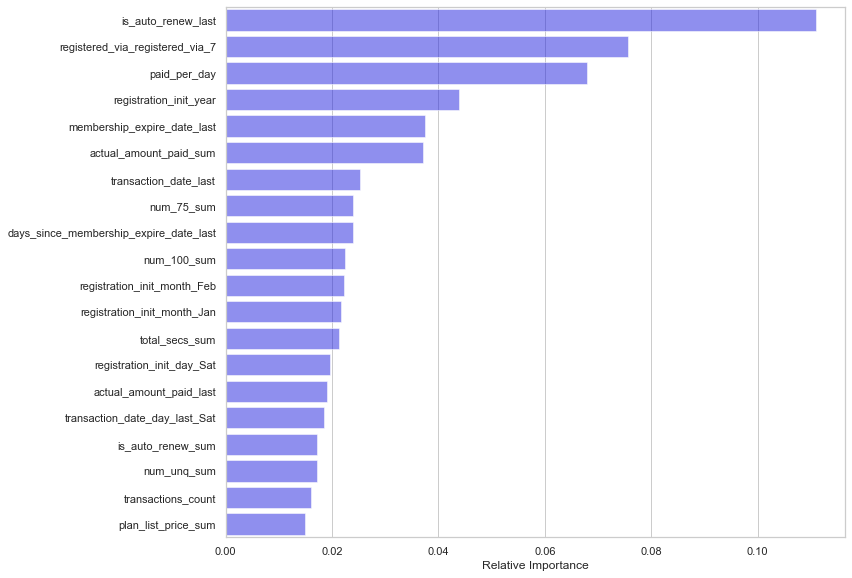

In [56]:
# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance_sorted.index[:20], 
            x=feature_importance_sorted.values[:20],
            color='blue',
            alpha=.5,
            orient='h')
plt.tight_layout()
plt.xlabel('Relative Importance')
plt.show()

## SMOTE

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
model = XGBClassifier(objective='binary:logistic', 
                        eval_metric='logloss',
                        tree_method='hist')
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

parameters = {'model__learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'model__gamma' : [0, 2, 5, 10, 20, 50, 100],
              'model__max_depth': range(1, 21, 1),
              'model__subsample': [0.7, 0.8, 0.9, 1],
              'model__min_child_weight': [0.5, 1, 3, 5, 10],
              'model__n_estimators': [50, 75, 100, 200, 300],
              'model__scale_pos_weight':[1, 2, 5]
             }

random_search = RandomizedSearchCV(estimator=pipeline, 
                                   param_distributions=parameters,
                                   cv=PredefinedSplit(test_fold=my_test_fold),
                                   n_iter=30,
                                   verbose=3,
                                   refit=False, # to avoid refit on train + valid together
                                   scoring='neg_log_loss',
                                   return_train_score=True,
                                   random_state=42)
random_search.fit(X, y)

# Retrain on validation set to predict test set


# Imputation - categorical columns
imputer_most_freq = SimpleImputer(strategy='most_frequent')

X_valid_filled = X_valid.copy()
X_test_filled = X_test.copy()
X_valid_filled[categorical_columns] = pd.DataFrame(imputer_most_freq.fit_transform(X_valid_filled[categorical_columns]))
X_test_filled[categorical_columns] = pd.DataFrame(imputer_most_freq.transform(X_test_filled[categorical_columns]))

# imputation removed column names, put them back
X_valid_filled[categorical_columns].columns = X_valid[categorical_columns].columns
X_test_filled[categorical_columns].columns = X_test[categorical_columns].columns

# convert 'object' to category
X_valid_filled[categorical_columns] = X_valid_filled[categorical_columns].astype('category')
X_test_filled[categorical_columns] = X_test_filled[categorical_columns].astype('category')


# Imputation - numerical columns
imputer_median = SimpleImputer(strategy='median')

X_valid_filled = X_valid_filled.copy()
X_test_filled = X_test_filled.copy()
X_valid_filled[numerical_columns] = pd.DataFrame(imputer_median.fit_transform(X_valid_filled[numerical_columns]))
X_test_filled[numerical_columns] = pd.DataFrame(imputer_median.transform(X_test_filled[numerical_columns]))

# imputation removed column names, put them back
X_valid_filled[numerical_columns].columns = X_valid[numerical_columns].columns
X_test_filled[numerical_columns].columns = X_test[numerical_columns].columns


# one hot encoding
ohe_enc = OneHotEncoder(drop='first')
ohe_enc.fit(X_valid_filled[categorical_columns])
feature_names = ohe_enc.get_feature_names(categorical_columns)
X_valid_filled_ohe = ohe_enc.transform(X_valid_filled[categorical_columns])
X_valid_filled_ohe = pd.DataFrame(X_valid_filled_ohe.todense())
X_valid_filled_ohe.columns = feature_names
X_test_filled_ohe = ohe_enc.transform(X_test_filled[categorical_columns])
X_test_filled_ohe = pd.DataFrame(X_test_filled_ohe.todense())
X_test_filled_ohe.columns = feature_names

X_valid_filled.drop(categorical_columns, axis=1, inplace=True)
X_test_filled.drop(categorical_columns, axis=1, inplace=True)
X_valid_filled = pd.concat([X_valid_filled, X_valid_filled_ohe], axis=1)
X_test_filled = pd.concat([X_test_filled, X_test_filled_ohe], axis=1)

# training
gbm = xgbc.fit(X_valid_filled, y_valid)
y_pred_xgb = gbm.predict(X_test_filled)
y_pred_proba_xgb = gbm.predict_proba(X_test_filled)

test['is_churn'] = y_pred_proba_xgb[:,1].clip(0.+1e-15, 1-1e-15) 
test[['msno','is_churn']].to_csv('Data/Kaggle_Submissions/xgb_sub_scala_trans_and_memb_ohe_retrained_on_validation.csv', index=False)

test[['msno','is_churn']]

In [57]:
## Light GBM

In [90]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=500,
                         learning_rate= 0.2,
                         application='binary',
                         max_depth=5,
                         num_leaves=128,
                         verbosity=-1,
                         metric='binary_logloss')

clf.fit(X_train_filled, y_train, eval_set=[(X_valid_filled, y_valid)], 
            early_stopping_rounds=10)

[1]	valid_0's binary_logloss: 0.165009
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.158338
[3]	valid_0's binary_logloss: 0.155006
[4]	valid_0's binary_logloss: 0.152486
[5]	valid_0's binary_logloss: 0.15005
[6]	valid_0's binary_logloss: 0.148321
[7]	valid_0's binary_logloss: 0.146934
[8]	valid_0's binary_logloss: 0.145914
[9]	valid_0's binary_logloss: 0.144753
[10]	valid_0's binary_logloss: 0.144379
[11]	valid_0's binary_logloss: 0.143848
[12]	valid_0's binary_logloss: 0.141994
[13]	valid_0's binary_logloss: 0.142007
[14]	valid_0's binary_logloss: 0.141612
[15]	valid_0's binary_logloss: 0.141496
[16]	valid_0's binary_logloss: 0.141264
[17]	valid_0's binary_logloss: 0.141136
[18]	valid_0's binary_logloss: 0.140889
[19]	valid_0's binary_logloss: 0.14065
[20]	valid_0's binary_logloss: 0.140455
[21]	valid_0's binary_logloss: 0.140443
[22]	valid_0's binary_logloss: 0.140418
[23]	valid_0's binary_logloss: 0.140324
[24]	valid_0's binary_logloss:

LGBMClassifier(application='binary', learning_rate=0.2, max_depth=5,
               metric='binary_logloss', n_estimators=500, num_leaves=128,
               verbosity=-1)

In [91]:
y_lgb_pred_valid_proba = clf.predict_proba(X_valid_filled)
y_lgb_pred_train_proba = clf.predict_proba(X_train_filled)
y_lgb_pred_valid = clf.predict(X_valid_filled)
y_lgb_pred_train = clf.predict(X_train_filled)

print('LGBM Classifier log-loss train set: ' + str(log_loss(y_train, y_lgb_pred_train_proba[:,1])))
print('LGBM Classifier log-loss valid set: ' + str(log_loss(y_valid, y_lgb_pred_valid_proba[:,1])))

LGBM Classifier log-loss train set: 0.1138190054556709
LGBM Classifier log-loss valid set: 0.13990228742453145


In [92]:
features_names = X_train_filled.columns
importances = clf.feature_importances_

feature_importance = pd.Series(data=importances,
                               index=features_names)
feature_importance_sorted = feature_importance.sort_values(ascending=False)
feature_importance_sorted

transaction_date_last                             55
num_unq_sum                                       51
membership_expire_date_last                       48
date_last                                         47
total_secs_sum                                    45
registration_init_time                            38
actual_amount_paid_sum                            38
plan_duration_last                                36
plan_duration_mean                                32
num_unq_mean                                      32
plan_duration_sum                                 30
paid_per_day                                      27
bd                                                26
num_25_sum                                        25
num_100_sum                                       25
num_50_sum                                        24
member_for_days                                   24
is_auto_renew_sum                                 23
num_75_sum                                    

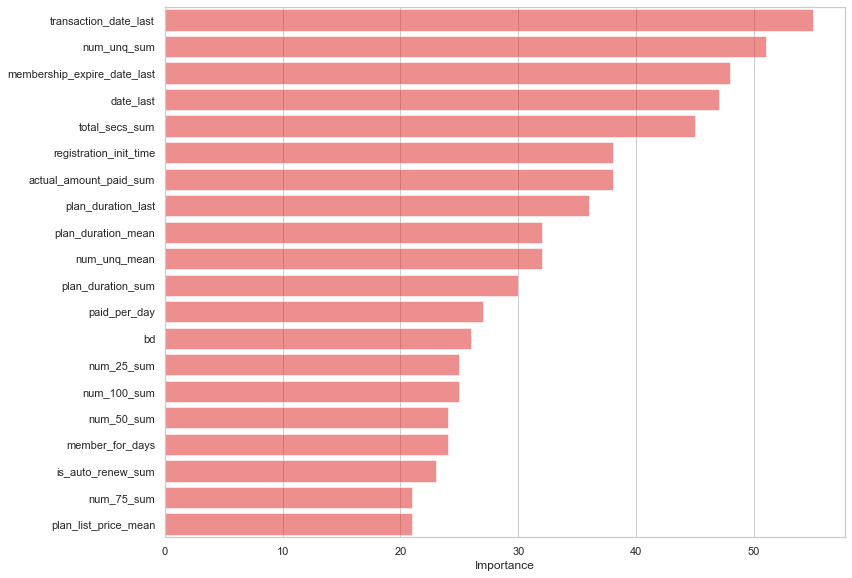

In [93]:
# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance_sorted.index[:20], 
            x=feature_importance_sorted.values[:20],
            color='red',
            alpha=.5,
            orient='h')
plt.tight_layout()
plt.xlabel('Importance')
plt.show()